In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
x,y = make_moons(n_samples = 100, noise = 0.25, random_state = 42)

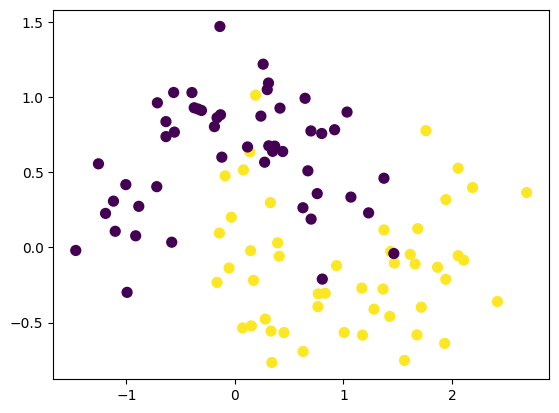

In [7]:
plt.scatter(x[:,0],x[:,1],c = y, s = 50)

In [8]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim = 2))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
adam = Adam(learning_rate = 0.01)
model.compile(loss = 'binary_crossentropy',optimizer = adam, metrics = ['accuracy'])
history = model.fit(x,y,validation_split = 0.2, epochs = 2000,verbose = 0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


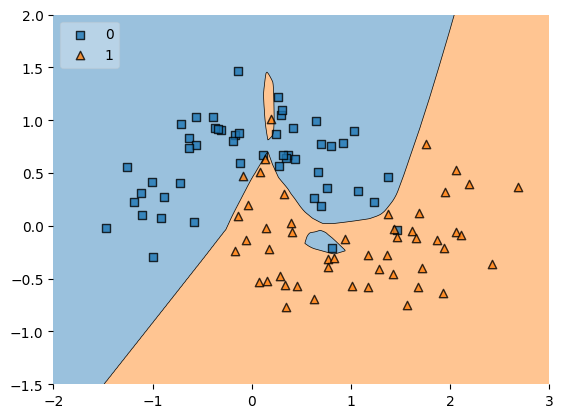

In [12]:
plot_decision_regions(x,y.astype('int'),clf = model,legend = 2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

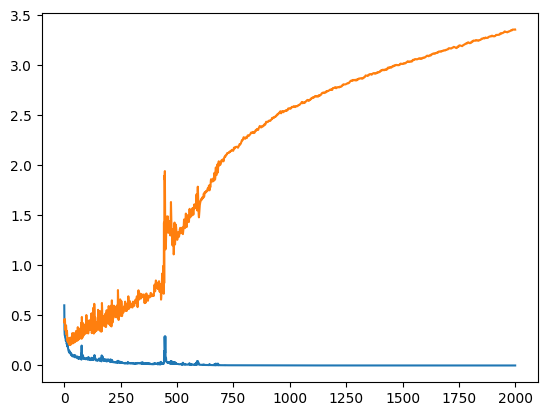

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [16]:
model2 = Sequential()
model2.add(Dense(128,activation = 'relu',input_dim = 2,kernel_regularizer = tf.keras.regularizers.l1(0.001)))
model2.add(Dense(128,activation = 'relu',kernel_regularizer = tf.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation = 'sigmoid'))
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
adam = Adam(learning_rate = 0.01)
model2.compile(loss = 'binary_crossentropy',optimizer = adam, metrics = ['accuracy'])
history = model2.fit(x,y,validation_split = 0.2, epochs = 2000,verbose = 0)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


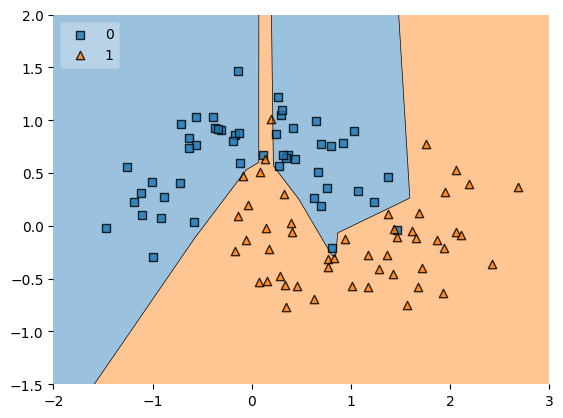

In [18]:
plot_decision_regions(x,y.astype('int'),clf = model2,legend = 2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

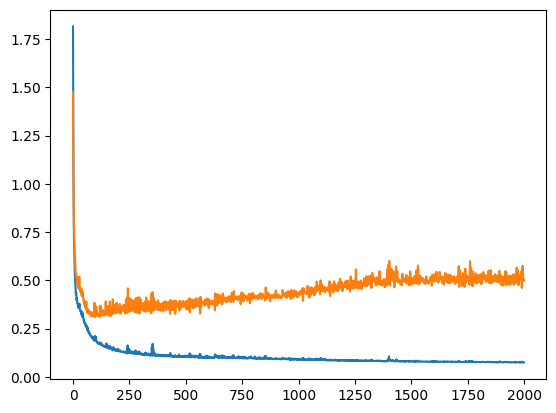

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [20]:
model_weight_layer = model.get_weights()[0].reshape(256)
model2_weight_layer = model2.get_weights()[0].reshape(256)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: >

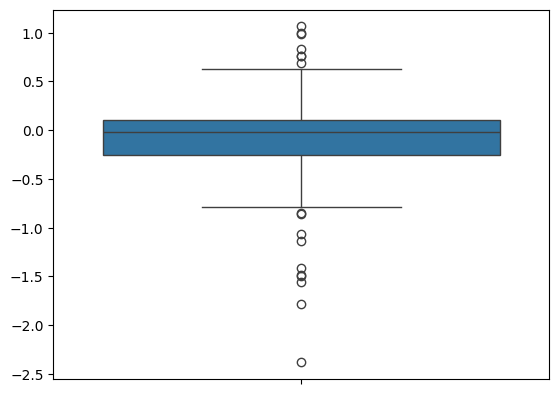

In [21]:
sns.boxplot(model_weight_layer)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: >

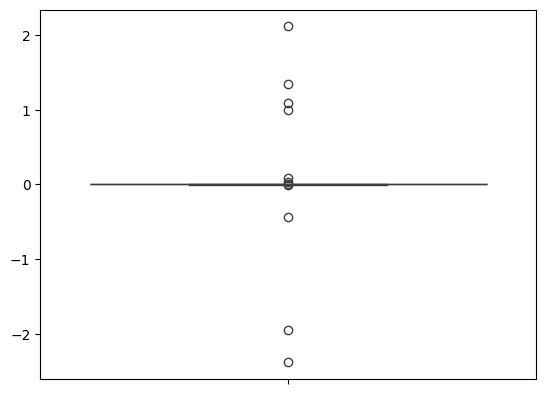

In [22]:
sns.boxplot(model2_weight_layer)

<ipython-input-23-469a6ca380f5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layer)
<ipython-input-23-469a6ca380f5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer)


<Axes: ylabel='Density'>

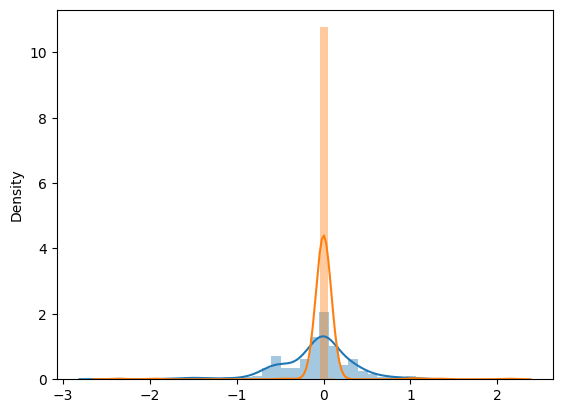

In [23]:
sns.distplot(model_weight_layer)
sns.distplot(model2_weight_layer)


In [24]:
model_weight_layer.min()

-2.382934

In [25]:
model2_weight_layer.min()

-2.383236

In [26]:
model.get_weights()[0].reshape(256)

array([-2.51258671e-01, -6.01633072e-01, -6.19863749e-01, -9.53827873e-02,
        1.72362506e-01, -5.40563405e-01,  3.11426610e-01, -8.61708343e-01,
       -7.92701840e-01, -5.57175726e-02, -4.23420876e-01,  1.94169015e-01,
        4.27353829e-01,  2.98991501e-01,  2.12197572e-01, -1.68151200e-01,
       -5.74777007e-01, -4.95630264e-01,  3.11969995e-01,  1.55530676e-01,
       -5.96382692e-02, -1.96816381e-02,  2.41093095e-02, -4.82481033e-01,
       -6.69867732e-03, -4.96275574e-01, -6.67046010e-01, -1.27021654e-03,
       -2.33376458e-01,  2.75827497e-01,  4.14210558e-01,  3.47251952e-01,
        2.66790181e-01, -6.45272374e-01,  2.15376869e-01, -2.38293409e+00,
       -2.87340492e-01, -8.00147951e-02, -7.74646759e-01,  5.48143804e-01,
        4.40332055e-01, -2.39603668e-01,  1.06682844e-01,  2.09604427e-01,
       -1.30562544e-01, -5.09935319e-01, -1.25055656e-01, -2.36914247e-01,
        2.42675662e-01, -6.73703611e-01,  2.25718506e-02, -5.07940471e-01,
       -3.13810498e-01, -